
# From company’s Overview
● Jamboree is a renowned educational institution that has successfully assisted numerous
students in gaining admission to top colleges abroad. With their proven
problem-solving methods, they have helped students achieve exceptional scores on
exams like GMAT, GRE, and SAT with minimal effort.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Jamboree_Admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
# statastical summary of entire dataset
display(df.describe())

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000




*   GRE score range from [290-340]
*   Tofel score range from [92-120]



Distribution in univarient Analysis

<Axes: >

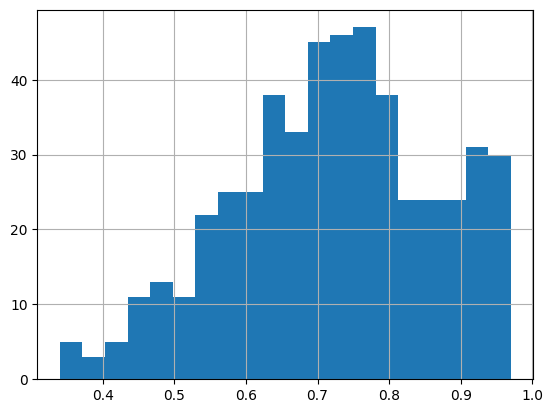

In [6]:
df['Chance of Admit '].hist(bins=20)

<Axes: xlabel='CGPA', ylabel='Density'>

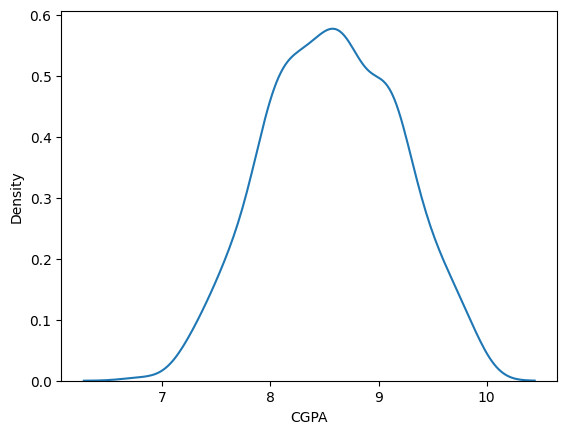

In [7]:
sns.kdeplot(df['CGPA'])

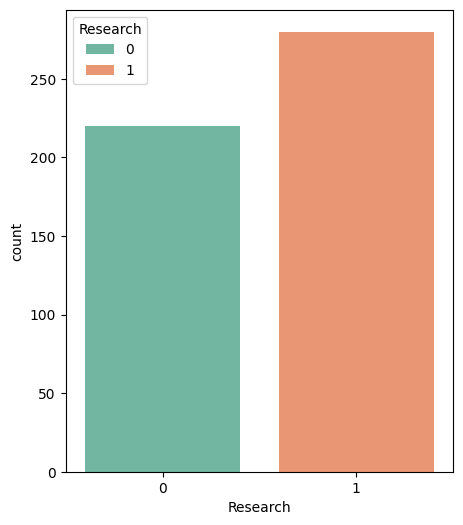

In [8]:
fig = plt.figure(figsize=(5,6))
sns.countplot(x="Research",hue="Research",data=df,palette = "Set2")
plt.show()

In [9]:
abs_value=df["Research"].value_counts(ascending=False)
rel_value=df["Research"].value_counts(ascending=False,normalize=True).values*100
print(abs_value)
print(rel_value)


Research
1    280
0    220
Name: count, dtype: int64
[56. 44.]




1.   Out of 500: 280(56%) student have research Experiance, 220(44%)student don`t have research experiance.
2.   CGPA ranges from [6.80-9.92]
3. Chance of admit ranges from [0.34-0.97]








**Distribution in Bivarient Analysis**

In [10]:
#creating function for linear plot and their correlation

def plot_print_correlation(df,x_col,y_col):
  """
  df=dataframe containing data columns
  x_col= column name for x-axis
  y_col=column name for y-axis
  """
  sns.lmplot(data=df,x=x_col,y=y_col)
  correlation_coefficient=df[x_col].corr(df[y_col])
  print(f'correlation_coefficient between {x_col} and {y_col}:{round(correlation_coefficient,2)}')

correlation_coefficient between GRE Score and Chance of Admit :0.81


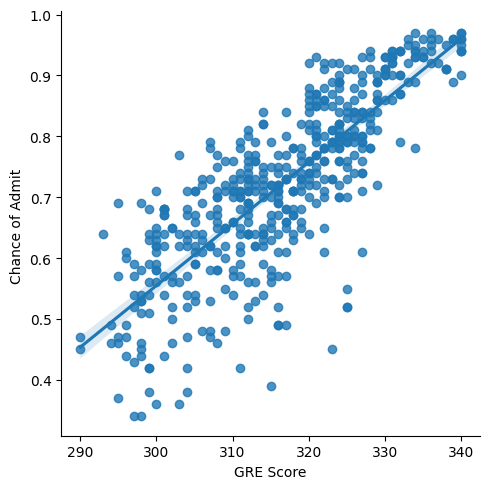

In [11]:
plot_print_correlation(df,"GRE Score",'Chance of Admit ')

correlation_coefficient between TOEFL Score and Chance of Admit :0.79


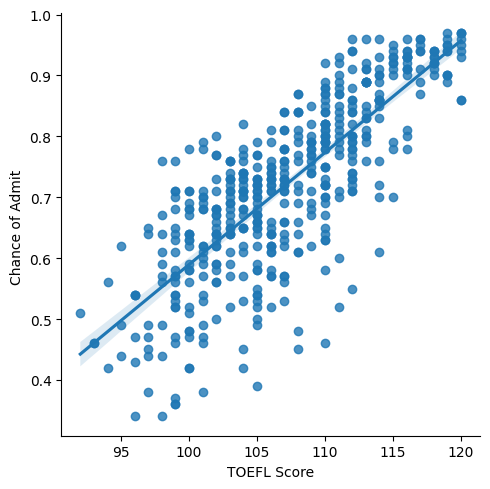

In [12]:
plot_print_correlation(df,"TOEFL Score",'Chance of Admit ')


1.   Linear correlation is between GRE_score and Chance of admit and
correaltion coefficient=0.81
2.   Linear correlation is between Tofel_score and Chance of admit and correaltion coefficient=0.79
3. Both GRE_score and Tofel_score are important metric to get admission in university.







Data processing to check missing value,duplicates,outlier value

In [13]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [14]:
data=df[["GRE Score","TOEFL Score",'University Rating','SOP','LOR ','CGPA','Research','Chance of Admit ']]
data=pd.DataFrame(data)

<Axes: >

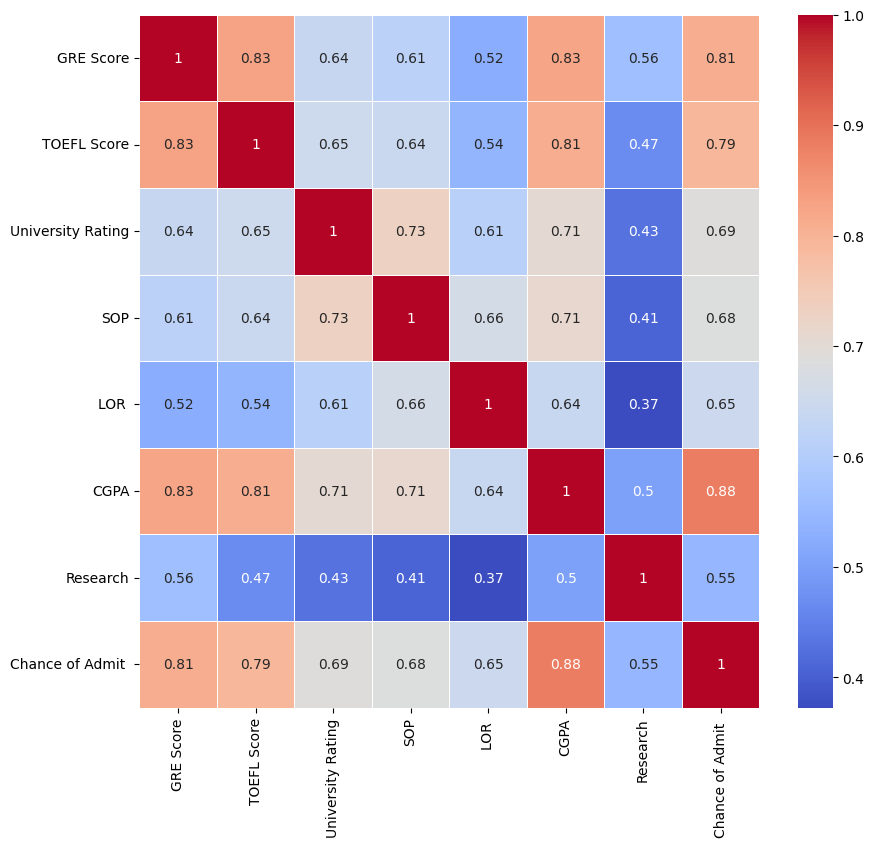

In [15]:
plt.figure(figsize=(10,9))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm",linewidth=0.5)

We see following correlation


1.   GRE_score,Tofel_Score,CGPA have strong correlation > 0.8
2.   University_rating ,SOP,LOR and Research experiance are equally important matrix for chance of admit.


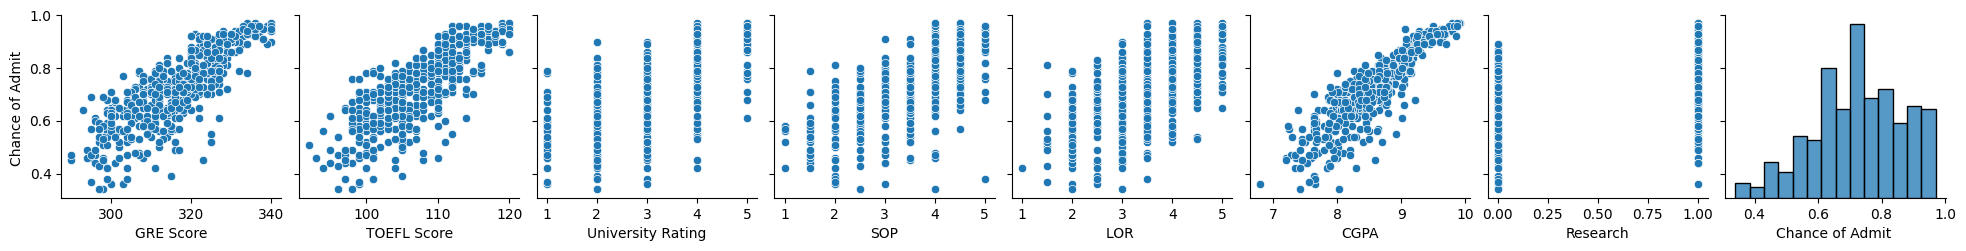

In [16]:
sns.pairplot(data,y_vars=['Chance of Admit '])

In [17]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [18]:
df.duplicated().sum()

0



1.   There is no null and duplicated values in dataset.



In [19]:
from scipy.stats import kurtosis,skew
TOFEL_skew=skew(df['TOEFL Score'],axis=0,bias=True)
TOFEL_skew


0.09531393010261811



*   For a distribution having kurtosis < 3: It is called playkurtic.
*   Both GRE=-0.7159 and TOfel=-0.6587 respectively hence dataset is playkurtic



In [20]:
def skew_kurtosis(df,column_name):
  """
  creating normal distribution plot and calulating skewness and kurtosis for dataset
  """
  df[column_name].plot.density()
  plt.title=(f'Density plot for {column_name}')
  plt.xlabel(column_name)
  plt.ylabel("Density")
  plt.show()
# Calculate Kurtosis and skewness
  col_kurtosis=kurtosis(df[column_name],axis=0,bias=True)
  col_skew=skew(df[column_name],axis=0,bias=True)

  print(f'Kurtosis for {column_name} is: {col_kurtosis}')
  print(f'skew for {column_name} is: {col_skew}')

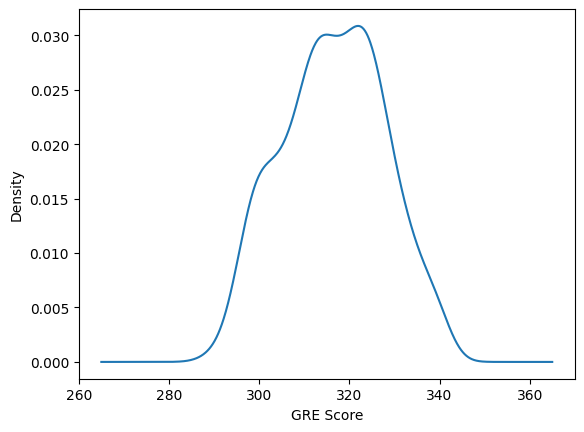

Kurtosis for GRE Score is: -0.7159497473139949
skew for GRE Score is: -0.03972223277299966


In [21]:
skew_kurtosis(df,'GRE Score')

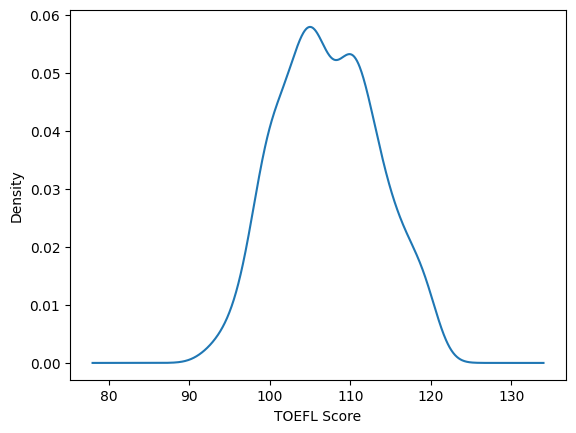

Kurtosis for TOEFL Score is: -0.6587072628939645
skew for TOEFL Score is: 0.09531393010261811


In [22]:
skew_kurtosis(df,'TOEFL Score')



*   Both TOFEL_SCORE AND GRE_SCORE  are platykturic  distribution casue kurtosis < 3
*   GRE_Score is left skew where as Tofel_score is Right skewed.



**Prepating data for Modelling**

In [23]:
#Scaling the data using Min_Max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scale=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_scale.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.000000,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.002004,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.004008,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.006012,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.008016,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063


**Splitting the data for train_test_split function**

In [24]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df_scale,test_size=0.2,random_state=1)

In [25]:
df_train.shape

(400, 9)

In [26]:
df_test.shape

(100, 9)

In [27]:
y_train=df_train['Chance of Admit ']
x_train=df_train.drop(['Chance of Admit ','Serial No.'],axis=1)
y_train.shape,x_train.shape

((400,), (400, 7))

In [28]:
y_test=df_test['Chance of Admit ']
x_test=df_test.drop(['Chance of Admit ','Serial No.'],axis=1)
y_test.shape,x_test.shape

((100,), (100, 7))

In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
model.coef_

array([0.14541621, 0.14106352, 0.03891338, 0.01907985, 0.09159877,
       0.57796411, 0.03157108])

In [31]:
model.intercept_

0.018693219780457793

Let's check the performance of our previously trained model on test data.

In [32]:
model.score(x_train,y_train)

0.8215099192361265

In [33]:
model.score(x_test,y_test)

0.8208741703103732

In [34]:
cols=df_scale.drop(columns=[df_scale.columns[-1]])


In [35]:
# Displaying column name with model coeffient
coeff_dict=dict(zip(cols.columns,model.coef_))
coeff_dict

{'Serial No.': 0.14541620599466432,
 'GRE Score': 0.1410635193731643,
 'TOEFL Score': 0.03891337690960878,
 'University Rating': 0.019079851592410282,
 'SOP': 0.09159876660812911,
 'LOR ': 0.5779641114318913,
 'CGPA': 0.03157107794156394}

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Serial No.'),
  Text(1, 0, 'GRE Score'),
  Text(2, 0, 'TOEFL Score'),
  Text(3, 0, 'University Rating'),
  Text(4, 0, 'SOP'),
  Text(5, 0, 'LOR '),
  Text(6, 0, 'CGPA')])

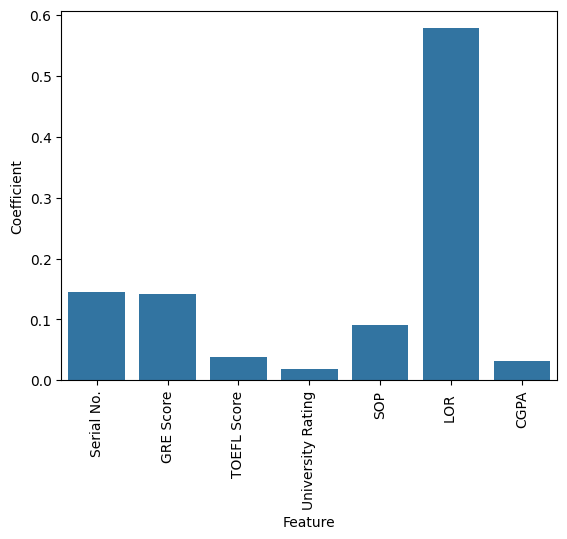

In [36]:
imp=pd.DataFrame(list(coeff_dict.items()), columns=['Feature', 'Coefficient'])
sns.barplot(x='Feature',y='Coefficient',data=imp)
plt.xticks(rotation=90)

In [37]:
#Let's implement it for our earlier model and test data
y_hat=model.predict(x_test)
y_hat

array([0.49784861, 0.57211971, 0.95874419, 0.62120358, 0.75744731,
       0.51609063, 0.64359078, 0.59362311, 0.71227185, 0.50244074,
       0.52195512, 0.35262147, 0.70193023, 0.72317653, 0.68518869,
       0.82185736, 0.45902052, 0.66978499, 0.88489824, 0.52668273,
       0.45783759, 0.72047647, 0.7968502 , 0.4002296 , 0.71232259,
       0.36320112, 0.970822  , 0.48312348, 0.8258256 , 0.58861527,
       0.46562057, 0.75400178, 0.40910717, 0.90549255, 0.26652651,
       0.75896789, 0.55111319, 0.46540382, 0.50723991, 0.90745734,
       0.35829713, 0.50918643, 0.68626119, 1.00151975, 0.68540644,
       0.2894535 , 0.51902313, 0.46079161, 0.49782176, 0.50891734,
       0.78338084, 0.91827548, 0.85440056, 0.44333049, 0.67989432,
       0.48088514, 0.64709923, 0.41800985, 0.50699731, 0.56582297,
       0.15497635, 0.60613709, 0.65566715, 0.8081426 , 1.01612007,
       0.42944255, 0.62200407, 0.68880995, 0.9546544 , 0.57548434,
       0.41718373, 0.49862798, 0.76851132, 0.23976105, 0.92982

In [38]:
Adj_R= (1-model.score(x_test,y_test)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted R-squared:",Adj_R)

Adjusted R-squared: 0.11666801238340263


In [39]:
import statsmodels.api as sm
x_sm = sm.add_constant(x_train)
sm_model = sm.OLS(y_train,x_sm)
result = sm_model.fit()
# Print the summary statistics of the model
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.7
Date:                Fri, 07 Jun 2024   Prob (F-statistic):          2.10e-142
Time:                        15:38:35   Log-Likelihood:                 374.46
No. Observations:                 400   AIC:                            -732.9
Df Residuals:                     392   BIC:                            -701.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0187      0.01



1.   Model Summary
R-squared (0.822): This indicates that approximately 82.2% of the variance in the dependent variable
𝑦
y is explained by the independent variables in the model. This is a relatively high value, suggesting a good fit.

2.   Adjusted R-squared (0.818): This value is slightly lower than the R-squared, accounting for the number of predictors in the model. It still indicates a good fit.

Coefficients and Significance


*   GRE_score
*   TOFEL_score and CGPA have higest significane







Multicoliearity and VIF

In [40]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler = StandardScaler()
x_tr_scaled=scaler.fit_transform(x_train)



In [41]:
#VIF calculation
vif=pd.DataFrame()
x_t=pd.DataFrame(x_tr_scaled,columns=x_train.columns)
vif['Feature']=x_t.columns
vif['VIF']=[variance_inflation_factor(x_t.values,i) for i in range (x_t.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
0,GRE Score,4.88
5,CGPA,4.75
1,TOEFL Score,4.26
3,SOP,2.92
2,University Rating,2.80
4,LOR,2.08
6,Research,1.51


In [42]:
cols2=vif['Feature'][1:].values
x2=pd.DataFrame(x_tr_scaled,columns=x_train.columns)[cols2]
x2_sm=sm.add_constant(x2) #Statmodels default is without intercept, to add intercept we need to add constant
sm_model=sm.OLS(list(y_train),x2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     292.5
Date:                Fri, 07 Jun 2024   Prob (F-statistic):          1.49e-141
Time:                        15:38:35   Log-Likelihood:                 369.51
No. Observations:                 400   AIC:                            -725.0
Df Residuals:                     393   BIC:                            -697.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6046      0.00

# Error Distribution

In [43]:
sm_model=sm.OLS(y_train,x_sm).fit()
sm_model


In [44]:
y_hat=sm_model.predict(x_sm)
errors=y_hat- y_train


Text(0.5, 0, 'Residuals')

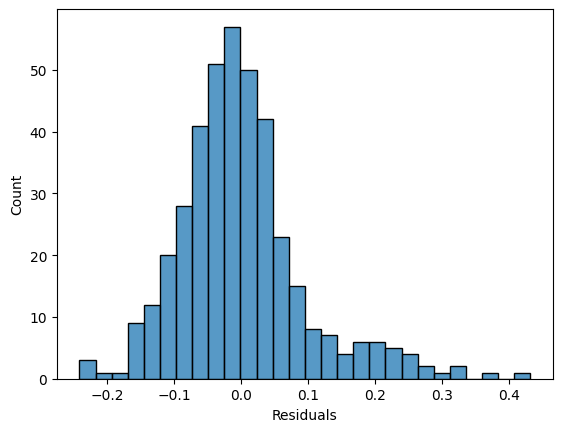

In [45]:
#Histogram of Residual
import seaborn as sns
sns.histplot(errors)
plt.xlabel("Residuals")


Conclusion: This looks like normal distribution with high mean and low SD

In [46]:
# Normality test  to check if the distribution is actuallu normal
#Shapiro-wilks test in stat module
from scipy import stats
res = stats.shapiro(errors)
print(res.statistic)

0.9360626935958862


# Conclusion:
Closer the value to 1 more is the normality
In this case,the value of 0.85 denote the high level of normality for the error distribution

Text(0, 0.5, 'Residuals')

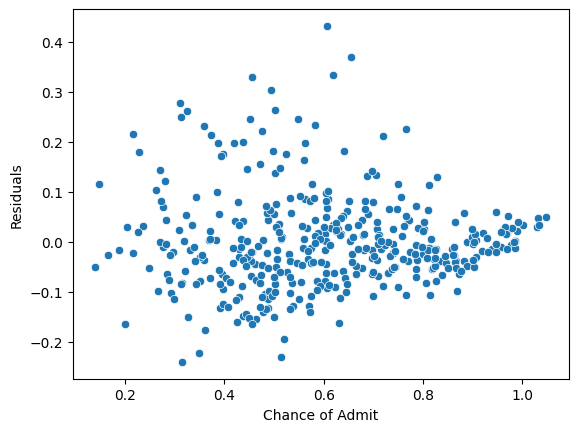

In [47]:
# Implementation of Heteroskedasity
sns.scatterplot(x=y_hat,y=errors)
plt.xlabel("Chance of Admit")
plt.ylabel("Residuals")


The residual plot does not provide strong evidence of heteroskedasticity. However, to confirm, you should perform statistical tests like Goldfeld Quandt to check homoskedacity

In [48]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [49]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, x_sm)
lzip(name, test)

[('F statistic', 0.9371472699603599), ('p-value', 0.673326946550699)]

From Goldfeld-Quandt test


1.   F-statistic comes out =1 ,Implying minimal differnece in variance between group
2.   There is no significant evidence of heteroscedasticity in your regression model.

